In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose, Dense, Reshape, LeakyReLU
from keras.utils.vis_utils import plot_model

# GENERATOR

In [2]:
def generator(latent_dim=100):
    model= Sequential()
    n_nodes=128*7*7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,128)))
    model.add(Conv2DTranspose(128,(4,4), padding='same', strides=(2,2)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128,(4,4), padding='same', strides=(2,2)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1,(7,7),activation='sigmoid',padding='same'))
    return model

In [3]:
model= generator()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 128)       0

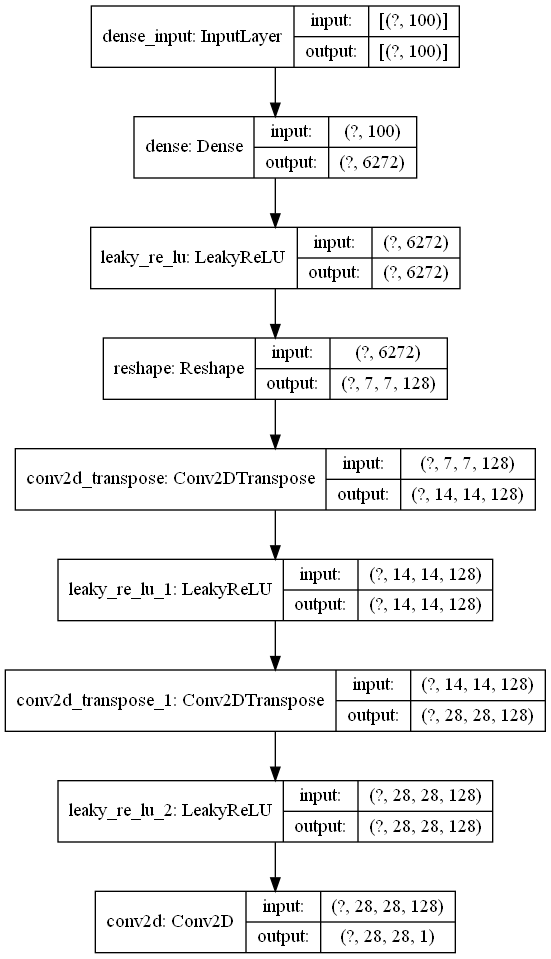

In [4]:
plot_model(model, to_file="generator_plot.png",show_shapes=True, show_layer_names=True)

# DISCRIMINATOR
The discriminator model takes an example from the domain as input (real or generated) and predicts
a binary class label of real or fake (generated).

In [5]:
from keras.layers import Flatten , Dropout
from keras.optimizers import Adam

def discriminator(in_shape=(28,28,1)):
    model = Sequential()
    model.add(Conv2D(64,(3,3), padding='same',strides=(2,2),input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64,(3,3), padding="same", strides=(2,2)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt, metrics=["accuracy"])
    return model

In [6]:
model = discriminator()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)             

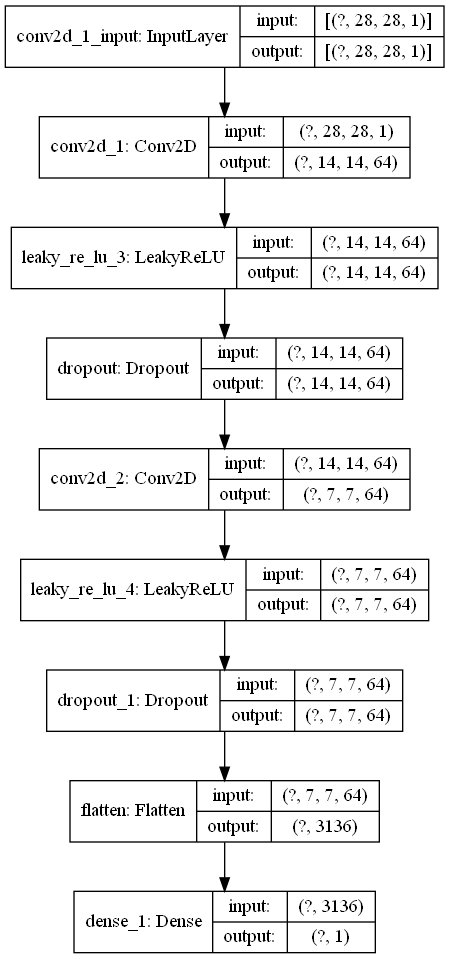

In [10]:
plot_model(model,to_file="discriminator_plot.png", show_shapes= True, show_layer_names=True )